<a href="https://colab.research.google.com/github/FelipePinheiro964/Steelsheets-weight-calculator/blob/main/steelsheets-weight-calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Programado por: Felipe Pinheiro Fossá


GNU GENERAL PUBLIC LICENSE

Version 3, 29 June 2007
# Modo de uso

**Utilizar apenas arquivos `.csv UTF-8`!**

Para iniciar, use capture_250205_101115.png ou as teclas `ctrl` + `enter`.

***LEIA AS INSTRUÇÕES ANTES DE INICIAR!***

---


O programa a seguir analisa uma tabela padrão com as medidas e espessuras de cada chapa fornecida pelo usuário, retornando um novo DataFrame com a coluna `Peso KG [total]` adicionada.

A tabela baseia-se nos dados do link https://acrobat.adobe.com/id/urn:aaid:sc:US:ebddd7b3-a2dd-4664-9d77-f92247f997d2 para o cálculo. UTILIZE O ARQUIVO DE MEDIDAS EXATAS DE ESPESSURA DISPONÍVEL NO SITE!


Para iniciar a leitura do seu arquivo, clique em `ficheiros` 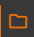 no canto superior esquerdo, arraste o seu arquivo para a aba aberta junto com os dados de espessura fornecidos (`steelsheets.csv`).

A aba deve ficar desta forma:

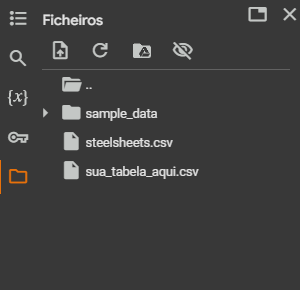

# Seleção de funções



> CASO 1


Utilizando o `caso 1`, podemos visualizar os dados da tabela `steelsheets`.



> CASO 2

No segundo caso, você deve fornecer o nome do arquivo que contém os dados de medidas e espessura das chapas (**O ARQUIVO DEVE ESTAR NA ABA FICHEIROS!**). Em seguida, serão retornadas duas tabelas:

* A tabela original fornecida pelo usuário para consulta.
* A tabela gerada pelo programa.

Na tabela fornecida pelo programa, estará disponível a coluna `Peso KG [total]`, que representa o peso total das peças listadas anteriormente.

* O resultado do peso é a soma de cada item; assim, se
você tiver 2 itens, o peso somado será o resultado.




```
peso = (x * y * multiplicador de espessura)  * quantidade
```



> CASO 3

Para utilizar a nova tabela fora do programa, use o terceiro caso para exportar o arquivo. Ao selecionar, digite o nome desejado para o arquivo, pressione a tecla `enter` e aguarde o arquivo na aba ficheiros 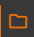. Após este processo, clique nos 3 pontos ao lado do novo arquivo na aba ficheiros, e selecione `"Transferir"`.

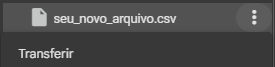


***IMPORTANTE!!***

Se você deseja baixar mais de um arquivo, faça isso individualmente, um por vez. O `caso 3` exportará **apenas o ultimo arquivo selecionado no** `caso 2`!!

> Finalizar programa


***CERTIFIQUE-SE DE TER FEITO TUDO O NECESSÁRIO NA SUA CONSULTA!***  
*Se não tiver finalizado sua consulta, será necessário reiniciar o programa e repetir os processos após a conclusão.*



Para finalizar o programa em qualquer momento, digite `"sair"`. O programa será encerrado e pode ser reiniciado utilizando capture_250205_101115.png ou as teclas `Ctrl` + `Enter`.







---



In [ ]:
# @title

#Import de ferramentas
import pandas as pd

#Variavel Padrao
should_exit = False

f = "steelsheets.csv"
steelsheets = pd.read_csv(f, sep=",")



# Carregar os dados principais
print("O arquivo carregado deve ser obrigatoriamente .csv,\ncom colunas pre-definidas.")
print("Utilize apenas o modelo especificado!")


#################################
####### Menu de selecao #########
#################################
while True:
  print("")
  print("-------Opções de uso---------")
  print("Selecione o numero para opção desejada")
  print("Digite 'sair' para finalizar o programa")
  print("1 - Visualizar tabela de chapas")
  print("2 - Calcular peso de chapas")
  print("3 - Fazer download da nova tabela")
  print('')

  try:
    print("Selecione a opção desejada de acordo com a lista acima:")
    menu = input()
    menu = str.lower(menu)
    if menu == "sair" or menu == FileExistsError:
      should_exit = True
      break
  except:

    TypeError or ValueError
    continue

  match menu:

    case '1':
      pd.set_option('display.max.rows', None)
      print("Tabela de chapas: ")
      display(steelsheets)

    case '2':

      # Carregar os dados principais
      print("O arquivo carregado deve ser obrigatoriamente .csv,\ncom colunas padrão definidas.")
      print("Utilize apenas o modelo especificado!")

      try:
        arq = input("Escreva o nome do seu arquivo: ")
        if arq == "sair":
          print("Finalizando programa...")
          should_exit = True
          break
        else:
          print(arq + ".csv")
          df = pd.read_csv(arq + ".csv", sep=",")
          print("Sua tabela: ")
          display(df)
      except (ValueError, TypeError) as e:
        print("Utilize um arquivo válido ou modifique o nome.")
        should_exit = True

      if not should_exit:
        # Extraindo valores das colunas
        name = df["Nome"].values
        cod = df["Identificador"].values
        x = df["xM"].values
        y = df["yM"].values
        z = df["espessura (mm)"].values
        quant = df["quantidade"].values

        # Inicializar uma lista para armazenar os resultados
        result = []

        # Loop para iterar sobre os dados
        for i in range(len(df)):

          #Leitura de linhas
          for _, row in steelsheets.iterrows():
            espessura = row["ESPESSURAMM"]
            kg = row["PESOKGM2"]

            # Verificar se a espessura corresponde
            if espessura == z[i]:
                # Calcular peso
                peso = x[i] * y[i] * kg * quant[i]  # Cálculo do peso

                # Adicionar resultado à lista
                result.append({
                    "Peça": name[i],
                    "Codigo": cod[i],
                    "Espessura": espessura,
                    "Peso KG [total]": round(peso, 2),
                    "Dimensões": f"{x[i]} x {y[i]}",
                    "Quantidade": quant[i]
                })

      # Criar um DataFrame com os resultados
      result_df = pd.DataFrame(result)

      # Reorganizar as colunas para exibição
      result_df = result_df[["Peça", "Codigo", "Espessura", "Peso KG [total]", "Dimensões", "Quantidade"]]

      # Exibir a tabela com os resultados
      print("Resultados: ")
      display(result_df)

    case '3':
        name = input("Insira um nome para tabela: ")
        name = str.lower(name)
        if name == "sair":
          print("Finalizando programa...")
          should_exit = True
          break
        else:
          result_df.to_csv(name + ".csv", index=False, encoding='utf-8')




---



# Possiveis erros

**IMPORTANTE!**

*Qualquer erro deve ser notificado ao programador para correção; não modifique o código sem antes consultar!*



---






> **TypeError or ValueError**


***Exemplos:***

```
TypeError: list indices must be integers or slices, not str
```




```
Traceback (most recent call last):
  File "/Users/ pankaj/Documents/PycharmProjects/hello-world/journaldev/errors/valueerror_examples.py", line 11, in <module>
    x = int(input('Please enter a positive number:\n'))
ValueError: invalid literal for int() with base 10: 'abc'
```

**Possiveis causas**

Esse tipo de erro geralmente ocorre devido a um erro de digitação ou à falta de um arquivo. Se isso acontecer, verifique se:


1.   O nome do arquivo é valido;
2.   Se um caractere especial foi usado inadequadamente;
3.   Se a tebela `steelsheets.csv` está presente na aba ficheiros.


**Solução**

Sempre opte por chamar o programador. Se não for possível, reinicie o programa, verifique os arquivos fornecidos e tente novamente. Se o erro persistir, evite testes sem a consulta prévia do programador.




> **KeyError**

**Exemplo:**


```
---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
<ipython-input-13-8982a1a307f8> in <cell line: 0>()
    109
    110       # Reorganizar as colunas para exibição
--> 111       result_df = result_df[["Peça", "Codigo", "Espessura", "Peso KG [total]", "Dimensões", "Quantidade"]]
    112
    113       # Exibir a tabela com os resultados
```
**Possiveis causas**

KeyError pode ocorrer devido à falta de dados em uma das colunas fornecidas pelo usuário.




**Solução**

Verifique se:



1.   O arquivo possui dados faltando como: `None`, -, `Null`;
2.   Verifique se a tabela `steelsheets` foi alterada;
3.   Verifique se não possui letras em colunas numéricas;
4.   Verifique se não há caracteres especiais no arquivo;
5.   Verifique se o arquivo está no formato `.csv UTF-8`.


Depois disso, reinicie o programa e tente novamente. Se o erro persistir, consulte o programador.




> **FileNotFoundError**

***Exemplo:***



```
Traceback (most recent call last):
  File "/Users/ AshleyStallings/Documents/School Work/Computer Programming/Side Projects/How many? (Python).py", line 9, in <module>
    fileScan= open(fileName, 'r')  #Opens file
FileNotFoundError: [Errno 2] No such file or directory: 'test.rtf'
```

**Possiveis causas**

O erro de arquivo não encontrado ocorre pela falta de dados fornecidos pelo usuário. Verifique se:



1.   O arquivo `steelsheets` está na aba ficheiros;
2.   O arquivo fornecido pelo usuário está presente na aba ficheiros;
3.   O arquivo está em um formato válido (`.csv UTF-8`);
4.   Se o usuário forneceu o nome correto do arquivo;
5.   Se o arquivo está corretamente separado por vírgulas.


**Solução**

Verifique os arquivos fornecidos e atualize a aba de arquivos. Utilize o bloco de notas para visualizar seu arquivo e certifique-se de que os dados estão separados por vírgulas. Reinicie a página e tente novamente. Se o erro persistir, consulte o programador.

> **NameError**

**Exemplo:**



```
---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<ipython-input-6-2b78fd2f84ef> in <cell line: 0>()
    121           break
    122         else:
--> 123           result_df.to_csv(nam + ".csv", index=False, encoding='utf-8')

NameError: name 'nam' is not defined
```


**Possiveis causas**

Para o NameError, a causa pode estar no codigo, anote a mensagem e notifique o programador.

**Solução**

Notifique o programador para corrigir o codigo. *NÃO SALVE O ARQUIVO!*



> **Codigo exibido na tela**

**Possiveis causas**

O código exibido na tela do usuário pode aparecer involuntariamente ou por engano ao selecionar `Mostrar código` ao lado do inicializador.


**Solução**

Se o código aparecer na tela, **NÃO MODIFIQUE O CÓDIGO**. Utilize a aba `Ver` no canto superior esquerdo, abaixo do título, e selecione `Mostrar/ocultar código`. Se a opção não estiver disponível, clique uma vez no código e tente novamente.





> **Para qualquer outro tipo de erro**

Se ocorrer um erro diferente dos listados, tente reiniciar a página. Se o problema persistir, consulte o programador. Verifique seus arquivos e use o programa apenas para o cálculo de peso com as tabelas fornecidas.







In [ ]:
import pandas as pd

# Variável padrão
should_exit = False

def carregar_dados_iniciais():
    f = "steelsheets.csv"
    steelsheets = pd.read_csv(f, sep=",")
    print("O arquivo carregado deve ser obrigatoriamente .csv,\ncom colunas pre-definidas.")
    print("Utilize apenas o modelo especificado!")
    return steelsheets

def exibir_tabela_chapas(steelsheets):
    pd.set_option('display.max.rows', None)
    print("Tabela de chapas: ")
    display(steelsheets)

def calcular_peso_chapas(steelsheets):
    print("O arquivo carregado deve ser obrigatoriamente .csv,\ncom colunas padrão definidas.")
    print("Utilize apenas o modelo especificado!")

    try:
        arq = input("Escreva o nome do seu arquivo: ")
        if arq.lower() == "sair":
            print("Finalizando programa...")
            return None

        df = pd.read_csv(arq + ".csv", sep=",")
        print("Sua tabela: ")
        display(df)

        # Extraindo valores das colunas
        name = df["Nome"].values
        cod = df["Identificador"].values
        x = df["xM"].values
        y = df["yM"].values
        z = df["espessura (mm)"].values
        quant = df["quantidade"].values

        # Inicializar uma lista para armazenar os resultados
        result = []

        # Loop para iterar sobre os dados e calcular peso
        for i in range(len(df)):
            for _, row in steelsheets.iterrows():
                espessura = row["ESPESSURAMM"]
                kg = row["PESOKGM2"]

                # Verificar se a espessura corresponde
                if espessura == z[i]:
                    peso = x[i] * y[i] * kg * quant[i]
                    result.append({
                        "Peça": name[i],
                        "Codigo": cod[i],
                        "Espessura": espessura,
                        "Peso KG [total]": round(peso, 2),
                        "Dimensões": f"{x[i]} x {y[i]}",
                        "Quantidade": quant[i]
                    })

        # Criar um DataFrame com os resultados
        result_df = pd.DataFrame(result)
        result_df = result_df[["Peça", "Codigo", "Espessura", "Peso KG [total]", "Dimensões", "Quantidade"]]
        print("Resultados: ")
        display(result_df)
        return result_df

    except (ValueError, TypeError):
        print("Utilize um arquivo válido ou modifique o nome.")
        return None

def salvar_tabela(result_df):
    name = input("Insira um nome para tabela: ").strip().lower()
    if name == "sair":
        print("Finalizando programa...")
        return
    result_df.to_csv(name + ".csv", index=False, encoding='utf-8')

def main():
    steelsheets = carregar_dados_iniciais()

    while True:
        print("\n-------Opções de uso---------")
        print("Selecione o número para opção desejada")
        print("Digite 'sair' para finalizar o programa")
        print("1 - Visualizar tabela de chapas")
        print("2 - Calcular peso de chapas")
        print("3 - Fazer download da nova tabela")
        print("")

        menu = input("Selecione a opção desejada de acordo com a lista acima: ").strip().lower()
        if menu == "sair":
            break

        match menu:
            case '1':
                exibir_tabela_chapas(steelsheets)
            case '2':
                result_df = calcular_peso_chapas(steelsheets)
            case '3':
                if 'result_df' in locals() and result_df is not None:
                    salvar_tabela(result_df)
                else:
                    print("Primeiro, calcule o peso das chapas antes de salvar.")

if __name__ == "__main__":
    main()

In [22]:
import pandas as pd

# Variável padrão
should_exit = False

def carregar_dados_iniciais_chapas():
    f = "steelsheets.csv"
    steelsheets = pd.read_csv(f, sep=",")
    print("O arquivo carregado deve ser obrigatoriamente .csv,\ncom colunas pre-definidas.")
    print("Utilize apenas o modelo especificado!")
    return steelsheets

def carregar_dados_iniciais_tubos():
    f = "rectangular-square-tube.csv"
    tube = pd.read_csv(f, sep=",")
    print("O arquivo carregado deve ser obrigatoriamente .csv,\ncom colunas pre-definidas.")
    print("Utilize apenas o modelo especificado!")
    return tube

def exibir_tabela_chapas(steelsheets):
    pd.set_option('display.max.rows', None)
    print("Tabela de chapas: ")
    display(steelsheets)

def exibir_tabela_tubos(tube_exibir):
    pd.set_option('display.max.rows', None)
    print("Tabela de tubos: ")
    display(tube_exibir)

def calcular_peso_chapas(steelsheets):
    print("O arquivo carregado deve ser obrigatoriamente .csv,\ncom colunas padrão definidas.")
    print("Utilize apenas o modelo especificado!")

    try:
        arq = input("Escreva o nome do seu arquivo: ")
        if arq.lower() == "sair":
            print("Finalizando programa...")
            return None

        df = pd.read_csv(arq + ".csv", sep=",")
        print("Sua tabela: ")
        display(df)

        # Extraindo valores das colunas
        name = df["Nome"].values
        cod = df["Identificador"].values
        x = df["xM"].values
        y = df["yM"].values
        z = df["espessura (mm)"].values
        quant = df["quantidade"].values

        # Inicializar uma lista para armazenar os resultados
        result = []

        # Loop para iterar sobre os dados e calcular peso
        for i in range(len(df)):
            for _, row in steelsheets.iterrows():
                espessura = row["ESPESSURAMM"]
                kg = row["PESOKGM2"]

                # Verificar se a espessura corresponde
                if espessura == z[i]:
                    peso = x[i] * y[i] * kg * quant[i]
                    result.append({
                        "Peça": name[i],
                        "Codigo": cod[i],
                        "Espessura": espessura,
                        "Peso KG [total]": round(peso, 2),
                        "Dimensões": f"{x[i]} x {y[i]}",
                        "Quantidade": quant[i]
                    })

        # Criar um DataFrame com os resultados
        result_df = pd.DataFrame(result)
        result_df = result_df[["Peça", "Codigo", "Espessura", "Peso KG [total]", "Dimensões", "Quantidade"]]
        print("Resultados: ")
        display(result_df)
        return result_df

    except (ValueError, TypeError):
        print("Utilize um arquivo válido ou modifique o nome.")
        return None

def salvar_tabela(result_df):
    name = input("Insira um nome para tabela: ").strip().lower()
    if name == "sair":
        print("Finalizando programa...")
        return
    result_df.to_csv(name + ".csv", index=False, encoding='utf-8')

def calcular_peso_tubo(tube):
    print("O arquivo carregado deve ser obrigatoriamente .csv,\ncom colunas padrão definidas.")
    print("Utilize apenas o modelo especificado!")

    try:
        arq = input("Escreva o nome do seu arquivo: ")
        if arq.lower() == "sair":
            print("Finalizando programa...")
            return None

        df = pd.read_csv(arq + ".csv", sep=",")
        print("Sua tabela: ")
        display(df)

        # Extraindo valores das colunas
        dimen = df["Largura"].values
        esp = df["Espessura"].values
        metros = df["Metros"].values

        result = []

        # Loop para calcular peso dos tubos
        for i in range(len(df)):
            for _, row in tube.iterrows():
                if row["Espessura"] == esp[i] and row["Largura"] == dimen[i]:
                    metros_barra = metros[i] / 6  # Considerando barras de 6 metros
                    peso = metros_barra * row["Peso"]

                    result.append({
                        "Largura": dimen[i],
                        "Espessura": esp[i],
                        "Peso KG [total]": round(peso, 2),
                        "Metros": metros[i]
                    })
                    break  # Encontrou correspondência, pode passar para próximo item

        # Criar DataFrame com os resultados
        if result:
            result_df = pd.DataFrame(result)
            print("Resultados: ")
            display(result_df)
            return result_df
        else:
            print("Nenhum resultado encontrado para as especificações fornecidas.")
            return None

    except FileNotFoundError:
        print(f"Erro: Arquivo '{arq}.csv' não encontrado.")
        return None
    except Exception as e:
        print(f"Erro: {str(e)}")
        print("Utilize um arquivo válido ou modifique o nome.")
        return None


def main():
    steelsheets = carregar_dados_iniciais_chapas()
    tube = carregar_dados_iniciais_tubos()

    while True:
        print("\n-------Opções de uso---------")
        print("Selecione o número para opção desejada")
        print("Digite 'sair' para finalizar o programa")
        print("1 - Visualizar tabela de chapas")
        print("2 - Calcular peso de chapas")
        print("3 - Fazer download da nova tabela")
        print("4 - Visualizar tabela de tubos")
        print("5 - Calcular peso de tubos")
        print("")

        menu = input("Selecione a opção desejada de acordo com a lista acima: ").strip().lower()
        if menu == "sair":
            break

        match menu:
            case '1':
                exibir_tabela_chapas(steelsheets)
            case '2':
                result_df = calcular_peso_chapas(steelsheets)
            case '3':
                if 'result_df' in locals() and result_df is not None:
                    salvar_tabela(result_df)
                else:
                    print("Primeiro, calcule o peso das chapas antes de salvar.")
            case '4':
                exibir_tabela_tubos(tube)
            case '5':
                result_df = calcular_peso_tubo(tube)


if __name__ == "__main__":
    main()

O arquivo carregado deve ser obrigatoriamente .csv,
com colunas pre-definidas.
Utilize apenas o modelo especificado!
O arquivo carregado deve ser obrigatoriamente .csv,
com colunas pre-definidas.
Utilize apenas o modelo especificado!

-------Opções de uso---------
Selecione o número para opção desejada
Digite 'sair' para finalizar o programa
1 - Visualizar tabela de chapas
2 - Calcular peso de chapas
3 - Fazer download da nova tabela
4 - Visualizar tabela de tubos
5 - Calcular peso de tubos

Selecione a opção desejada de acordo com a lista acima: 5
O arquivo carregado deve ser obrigatoriamente .csv,
com colunas padrão definidas.
Utilize apenas o modelo especificado!
Escreva o nome do seu arquivo: tubos
Sua tabela: 


,Largura,Espessura,Metros
0,100x250,5.3,6
1,40x40,1.2,6


Resultados: 


,Largura,Espessura,Peso KG [total],Metros
0,40x40,1.2,8.71,6



-------Opções de uso---------
Selecione o número para opção desejada
Digite 'sair' para finalizar o programa
1 - Visualizar tabela de chapas
2 - Calcular peso de chapas
3 - Fazer download da nova tabela
4 - Visualizar tabela de tubos
5 - Calcular peso de tubos

Selecione a opção desejada de acordo com a lista acima: 3
Insira um nome para tabela: tubo

-------Opções de uso---------
Selecione o número para opção desejada
Digite 'sair' para finalizar o programa
1 - Visualizar tabela de chapas
2 - Calcular peso de chapas
3 - Fazer download da nova tabela
4 - Visualizar tabela de tubos
5 - Calcular peso de tubos

Selecione a opção desejada de acordo com a lista acima: sair
